<a href="https://colab.research.google.com/github/kentokura/python_medical_images/blob/master/chapter3/chap3_14_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
from google.colab import drive
from IPython.display import Image, display_png

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 3.14 膨張と収縮
- エロージョン
- ダイレーション
- オープニング
- クロージング


リスト 3.14.1 モルフォロジーの実践


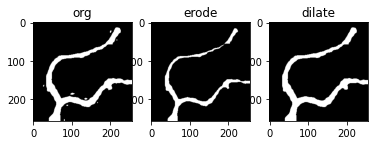

In [8]:
img = cv2.imread("/content/drive/My Drive/DATASET/dataset/vessel.png",
                 cv2.IMREAD_UNCHANGED)
img = np.invert(img) #黒い背景が必要
plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.title("org")

# エロージョンで周辺の微小構造を消す
kernel = np.ones((5,5), np.int8)
erode = cv2.erode(img, kernel, iterations = 1)
plt.subplot(132)
plt.imshow(erode, cmap="gray")
plt.title("erode")
dilate = cv2.dilate(erode, kernel, iterations = 1)
plt.subplot(133)
plt.imshow(dilate, cmap="gray")
plt.title("dilate")
plt.show()

## 3.15 アフィン変換


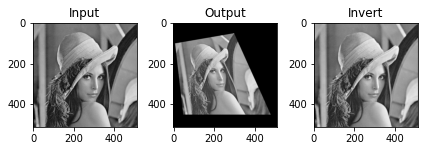

In [23]:
img = cv2.imread("/content/drive/My Drive/DATASET/dataset/lena-gray.png",
                 cv2.IMREAD_UNCHANGED)
rows, cols = img.shape

plt.subplot(131), plt.imshow(img, cmap="gray"), plt.title("Input")

# 任意の点を基準点として設定
pts1 = np.float32([[0,0], [511,0], [0,511], [511,511]])
pts2 = np.float32([[10,100], [300,50], [50,450], [480,450]])

M = cv2.getPerspectiveTransform(pts1, pts2)
trs = cv2.warpPerspective(img, M, (rows, cols))
plt.subplot(132), plt.imshow(trs, cmap="gray"), plt.title("Output")
plt.tight_layout()

M = cv2.getPerspectiveTransform(pts2, pts1)
trs2 = cv2.warpPerspective(trs, M, (rows, cols))
plt.subplot(133), plt.imshow(trs2, cmap="gray"), plt.title("Invert")
plt.show()